In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
og = pd.read_csv('data/GoodReads_100k_books.csv')
clean_book = pd.read_csv('data/after_encoding/clean_book_data.csv')

In [5]:
og['pages'] = og['pages'].apply(lambda x: np.nan if x == 0 else x)
og['rating'] = og['rating'].apply(lambda x: np.nan if x == 0 else x)

In [6]:
og.isnull().sum()

author              0
bookformat       3228
desc             6772
genre           10467
img              3045
isbn            14482
isbn13          11435
link                0
pages            7752
rating           1562
reviews             0
title               1
totalratings        0
dtype: int64

In [8]:
clean_book = clean_book.loc[:, ~clean_book.columns.str.contains('^Unnamed')] #delete Unnamed columns pandas

clean_book['pages'] = clean_book['pages'].apply(lambda x: np.nan if x == 0 else x)
clean_book['rating'] = clean_book['rating'].apply(lambda x: np.nan if x == 0 else x)
clean_book.isnull().sum()

author              0
bookformat          0
desc                0
genre               0
img                 0
isbn                0
link                0
pages            2174
rating             88
reviews             0
title               0
totalratings        0
price           44763
dtype: int64

In [10]:
genres = dict()

g_og = og.loc[~og['genre'].isnull()]
for _, row in g_og.iterrows():
    genre_list = row['genre'].split(',')
    for g in genre_list:
        if g not in genres:
            genres[g] = 0
        genres[g] += 1

genres

{'History': 15477,
 'Military History': 1828,
 'Civil War': 664,
 'American History': 2028,
 'American Civil War': 499,
 'Nonfiction': 29446,
 'North American Hi...': 1676,
 'Native Americans': 184,
 'Couture': 456,
 'Fashion': 455,
 'Historical': 18183,
 'Art': 5916,
 'Politics': 4353,
 'Labor': 193,
 'Business': 3577,
 'Leadership': 811,
 'Romance': 34324,
 'Historical Romance': 3657,
 'Management': 490,
 'Human Resources': 24,
 'Religion': 12323,
 'Buddhism': 710,
 'Philosophy': 5486,
 'Spirituality': 2980,
 'Psychology': 3402,
 'Anthropology': 992,
 'Academic': 4717,
 'Social Science': 637,
 'Sociology': 1862,
 'Biology': 1513,
 'Ecology': 239,
 'Economics': 1835,
 'Science': 10676,
 'Self Help': 3388,
 'Personal Development': 896,
 'Writing': 3107,
 'Journalism': 309,
 'Cultural': 14640,
 'France': 1422,
 'Autobiography': 4544,
 'Memoir': 3255,
 'World War II': 1378,
 'Holocaust': 353,
 'War': 5625,
 'Biography': 7101,
 'Biography Memoir': 1952,
 'Literature': 11422,
 'Jewish': 53

In [12]:
print("Number of genres: ", len(genres.keys()))

Number of genres:  1182


In [5]:
genres_clean = dict()

g_clean = clean_book.loc[~clean_book['genre'].isnull()]
for _, row in g_clean.iterrows():
    genre_list = row['genre'].split(',')
    for g in genre_list:
        if g not in genres_clean:
            genres_clean[g] = 0
        genres_clean[g] += 1

genres_clean

{'History': 14184,
 'Military History': 1706,
 'Civil War': 617,
 'American History': 1937,
 'American Civil War': 475,
 'Nonfiction': 26720,
 'North American Hi...': 1601,
 'Native Americans': 172,
 'Couture': 434,
 'Fashion': 433,
 'Historical': 15454,
 'Art': 5597,
 'Politics': 3946,
 'Labor': 171,
 'Business': 2778,
 'Leadership': 748,
 'Romance': 23126,
 'Historical Romance': 2865,
 'Management': 444,
 'Human Resources': 22,
 'Religion': 10844,
 'Buddhism': 632,
 'Philosophy': 4839,
 'Spirituality': 2706,
 'Psychology': 3117,
 'Anthropology': 933,
 'Academic': 4102,
 'Social Science': 580,
 'Sociology': 1550,
 'Biology': 1431,
 'Ecology': 232,
 'Economics': 1681,
 'Science': 9920,
 'Self Help': 3004,
 'Personal Development': 787,
 'Writing': 2846,
 'Journalism': 290,
 'Cultural': 12438,
 'France': 1278,
 'Autobiography': 4197,
 'Memoir': 3007,
 'World War II': 1248,
 'Holocaust': 322,
 'War': 4938,
 'Biography': 6483,
 'Biography Memoir': 1858,
 'Literature': 9808,
 'Jewish': 500,

In [13]:
print("Number of genres: ", len(genres_clean.keys()))

Number of genres:  1161


While cleaning the data we lost some genres

In [14]:
print("Number of bookformats: ", len(og.bookformat.unique()))

Number of bookformats:  203


In [15]:
print("Number of bookformats: ", len(clean_book.bookformat.unique()))

Number of bookformats:  114


Whiel cleaning data we lost almost half of the bookformats...not so good

### What are the most popular book genres?

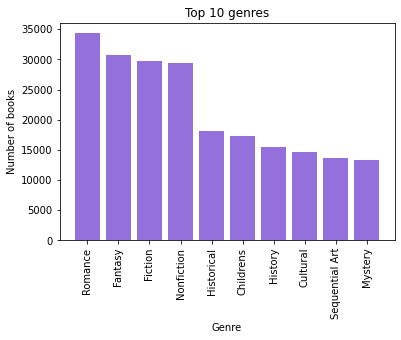

In [20]:
from collections import Counter
top_10_genres = dict(Counter(genres).most_common(10))

plt.title("Top 10 genres")
plt.xlabel("Genre")
plt.ylabel("Number of books")
plt.xticks(rotation=90)
plt.bar(list(top_10_genres.keys()), list(top_10_genres.values()), color='mediumpurple')
plt.show()

In [18]:
top_10_genres['Fiction']

29743

In [19]:
top_10_genres['Nonfiction']

29446

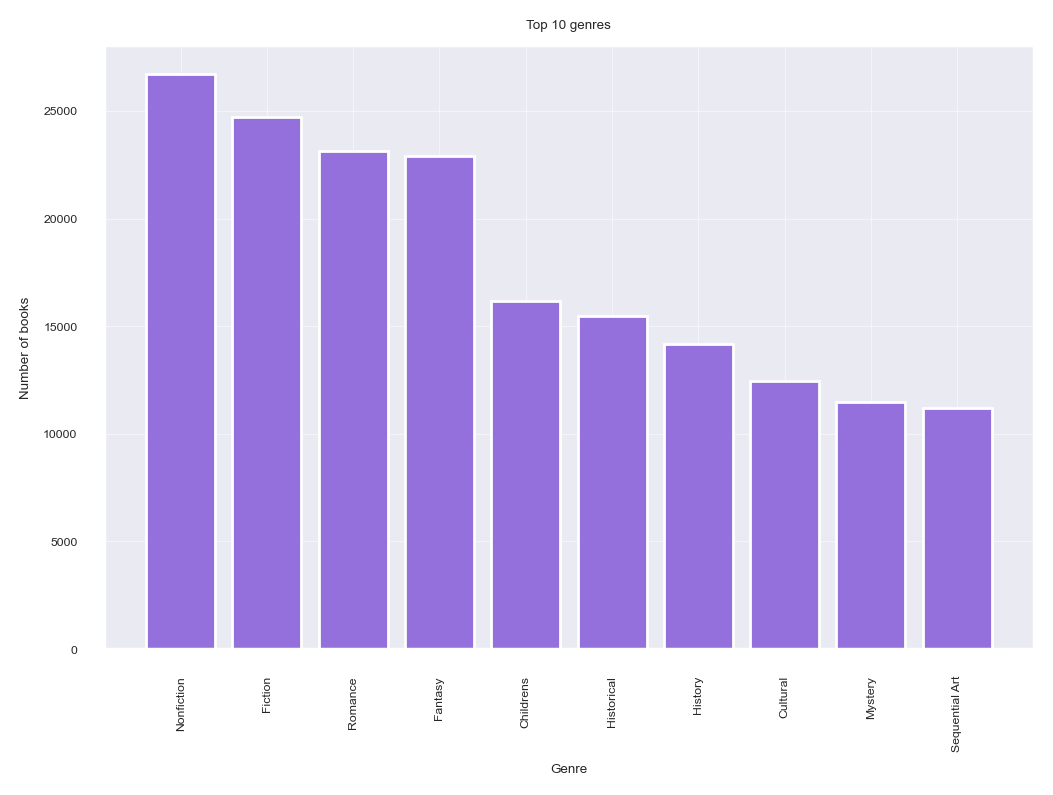

In [89]:
from collections import Counter

sns.set(style = 'darkgrid',font_scale=0.40,rc={"grid.linewidth": 0.2})
plt.figure(dpi=200)

top_10_genres_clean = dict(Counter(genres_clean).most_common(10))

plt.title("Top 10 genres")
plt.xlabel("Genre")
plt.ylabel("Number of books")
plt.xticks(rotation=90)
plt.bar(list(top_10_genres_clean.keys()), list(top_10_genres_clean.values()), color='mediumpurple')
plt.show()

In [21]:
top_10_author = dict(Counter(dict(og.author.value_counts())).most_common(10))
top_10_author

{'Mi-Ri Hwang': 137,
 'Willy Vandersteen': 76,
 'Yu-Rang Han': 75,
 'R.L. Stine': 75,
 'Elinor M. Brent-Dyer': 63,
 'Lynn Hagen': 62,
 'Anonymous': 61,
 "Louis L'Amour": 57,
 'Lynne Graham': 55,
 'Agatha Christie': 54}

In [22]:
len(og.author.unique())

68767

In [53]:
authors= pd.DataFrame(list(dict(og.author.value_counts())), columns=['Authors'])
authors['num_books'] = list(dict(Counter(dict(og.author.value_counts()))).values())
authors


,Authors,num_books
0,Mi-Ri Hwang,137
1,Willy Vandersteen,76
2,Yu-Rang Han,75
3,R.L. Stine,75
4,Elinor M. Brent-Dyer,63
...,...,...
68762,"Caroline Smailes,Nik Perring,Darren Craske",1
68763,Mary Rodgers,1
68764,"Isabel Allende,Robert Shekter,Panchita Llona",1
68765,"Lytton Strachey,John Sutherland",1


<AxesSubplot:xlabel='num_books', ylabel='Authors'>

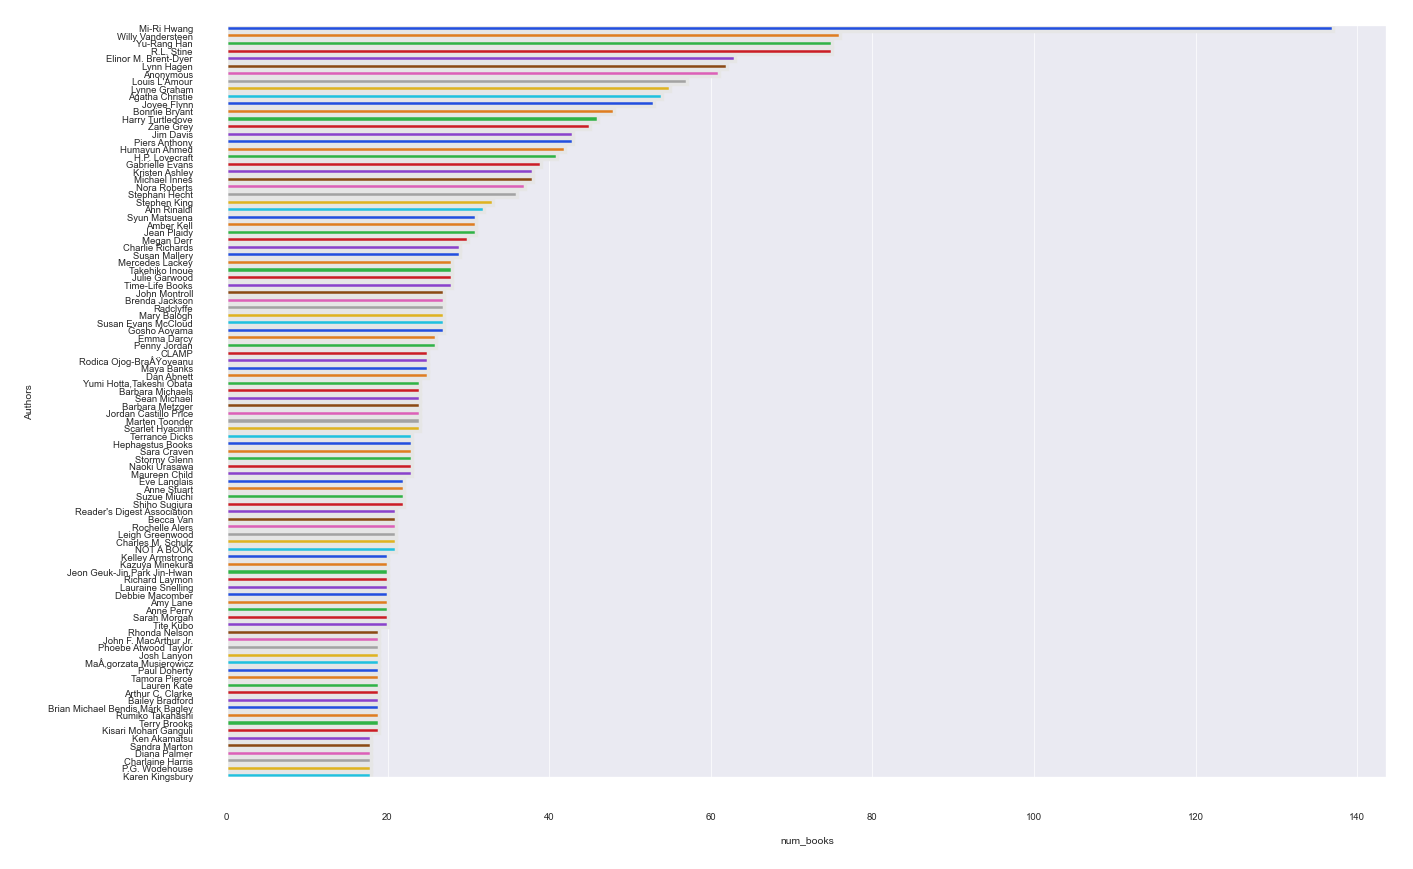

In [70]:
plt.figure(dpi=250)
palette = sns.color_palette("bright",15)
sns.set(style = 'darkgrid',font_scale=0.25,rc={"grid.linewidth": 0.2})

sns.barplot(y='Authors',x='num_books',
                palette=palette, 
                edgecolor=".9",
                data=authors[:100] )

In [38]:
top_10_author_clean = dict(Counter(dict(clean_book.author.value_counts())).most_common(10))
top_10_author_clean

{'R.L. Stine': 70,
 'Elinor M. Brent-Dyer': 57,
 'Lynne Graham': 55,
 "Louis L'Amour": 52,
 'Bonnie Bryant': 48,
 'Agatha Christie': 48,
 'Harry Turtledove': 44,
 'Lynn Hagen': 40,
 'Jim Davis': 40,
 'Piers Anthony': 40}

In [50]:
authors_clean= pd.DataFrame(list(dict(clean_book.author.value_counts())), columns=['Authors'])
authors_clean['num_books'] = list(dict(Counter(dict(clean_book.author.value_counts()))).values())
authors_clean


,Authors,num_books
0,R.L. Stine,70
1,Elinor M. Brent-Dyer,57
2,Lynne Graham,55
3,Louis L'Amour,52
4,Bonnie Bryant,48
...,...,...
51100,"Jenni Schaefer,Thom Rutledge",1
51101,"Immanuel Kant,Mary J. Gregor,Andrews Reath",1
51102,Peter Geye,1
51103,Martha E.H. Rustad,1


<AxesSubplot:xlabel='num_books', ylabel='Authors'>

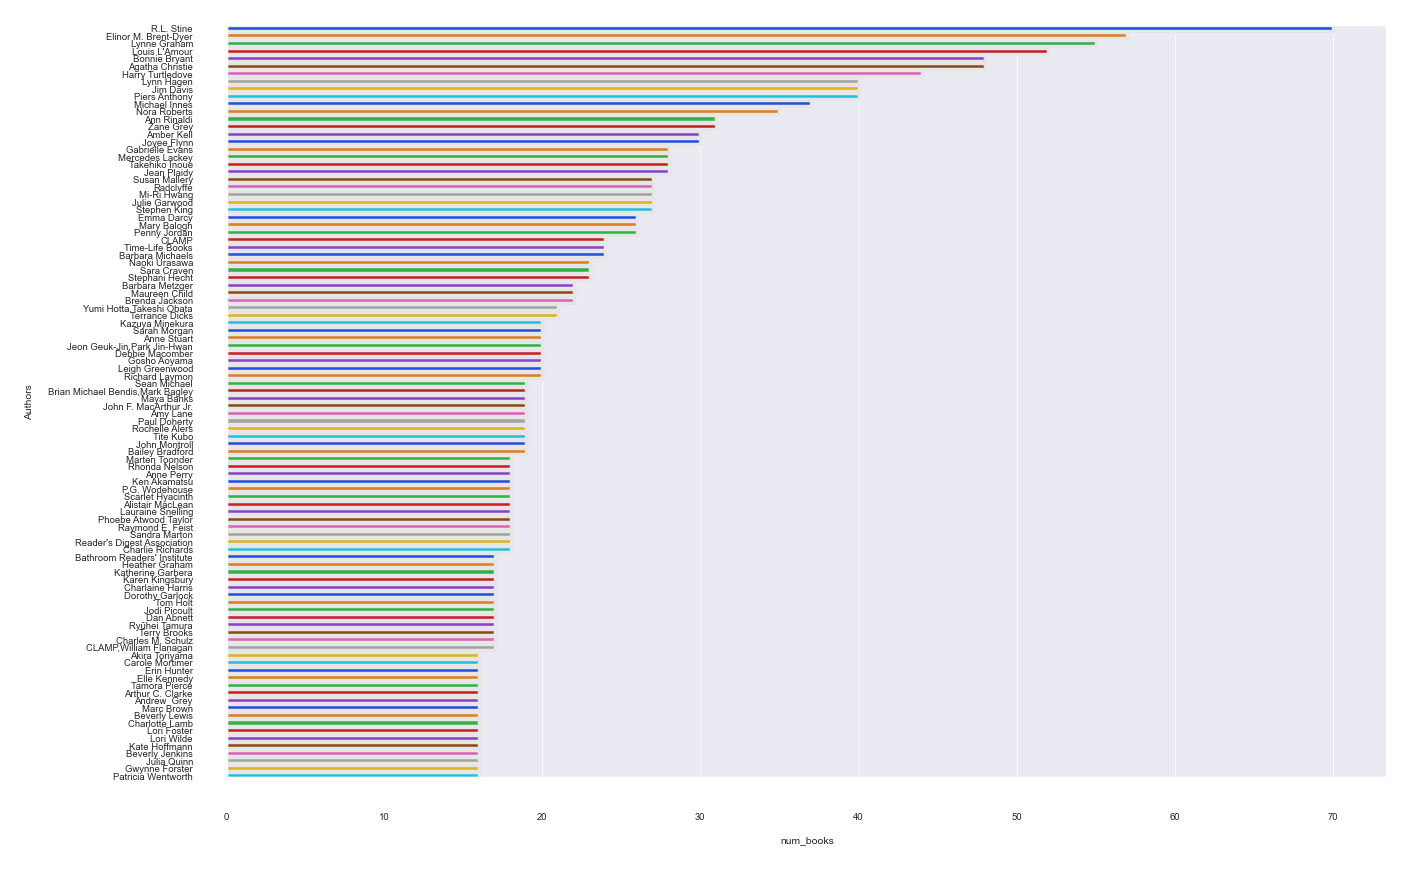

In [51]:
plt.figure(dpi=250)
palette = sns.color_palette("bright",15)
sns.set(style = 'darkgrid',font_scale=0.25,rc={"grid.linewidth": 0.2})

sns.barplot(y='Authors',x='num_books',
                palette=palette, 
                edgecolor=".9",
                data=authors_clean[:100] )

<Figure size 1200x800 with 0 Axes>

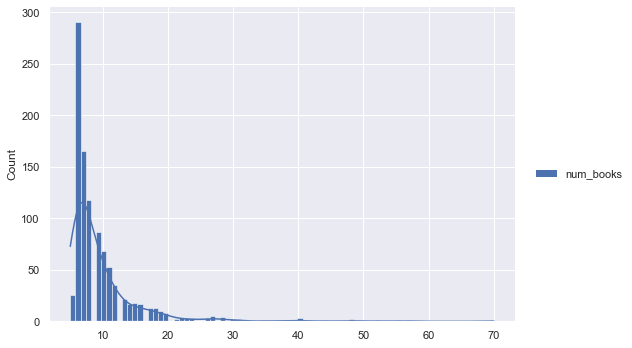

In [77]:
plt.figure(dpi=200)

sns.set(font_scale=1)
sns.displot(authors_clean[:1000],color='mediumpurple',kde=True,aspect=15/10,alpha = 1)


In [8]:
len(clean_book.author.unique())

51105

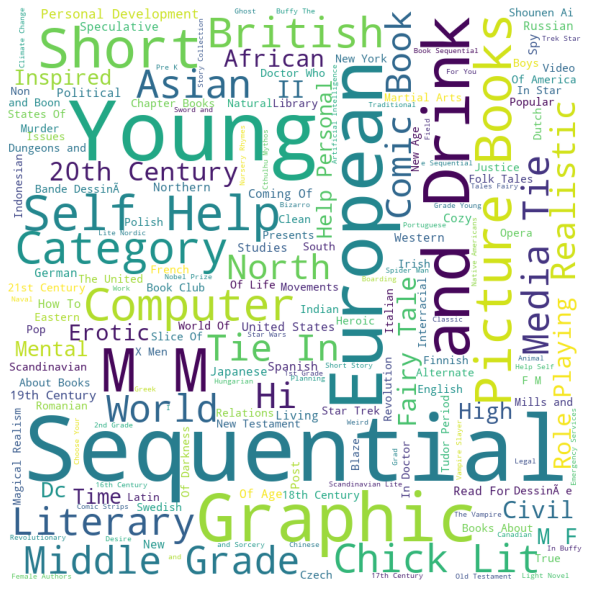

In [23]:
comment_words = ''

g_og = og.loc[~og['genre'].isnull()]
for _, row in g_og.iterrows():
    genre_list = row['genre'].split(',')
    for g in genre_list:
        g.replace(" ", "")
    comment_words += " ".join(genre_list) + " "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = genres.keys(),
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

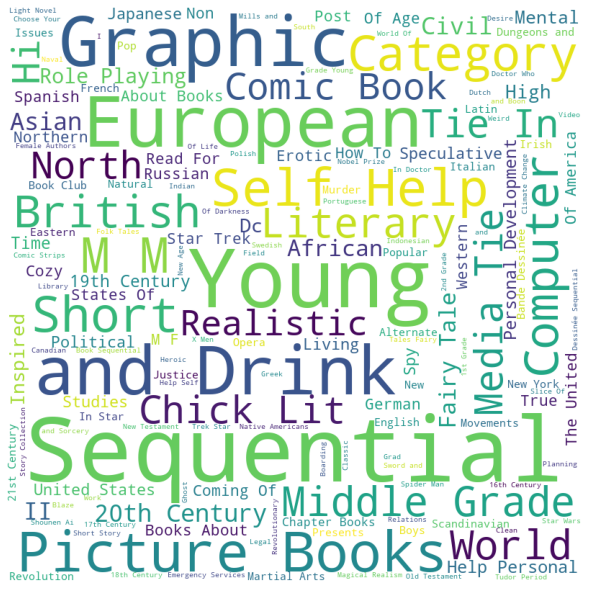

In [10]:
comment_words = ''

g_clean = clean_book.loc[~clean_book['genre'].isnull()]
for _, row in g_clean.iterrows():
    genre_list = row['genre'].split(',')
    for g in genre_list:
        g.replace(" ", "")
    comment_words += " ".join(genre_list) + " "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = genres_clean.keys(),
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [11]:
og.describe()

,pages,rating,reviews,totalratings
count,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,255.010240,3.833055,181.528450,2.990764e+03
std,367.913582,0.621237,1449.451229,3.635338e+04
min,0.000000,0.000000,0.000000,0.000000e+00
25%,135.000000,3.660000,3.000000,3.100000e+01
50%,240.000000,3.910000,15.000000,1.460000e+02
75%,336.000000,4.140000,67.000000,7.440000e+02
max,70000.000000,5.000000,158776.000000,3.819326e+06


In [13]:
clean_book = clean_book.loc[:, ~clean_book.columns.str.contains('^Unnamed')] #delete Unnamed columns pandas

clean_book.describe()

,pages,rating,reviews,totalratings
count,72249.000000,72249.000000,72249.000000,7.224900e+04
mean,277.005301,3.899851,208.850226,3.403266e+03
std,347.421574,0.364649,1413.575983,3.525319e+04
min,0.000000,0.000000,0.000000,0.000000e+00
25%,173.000000,3.700000,6.000000,5.500000e+01
50%,256.000000,3.920000,22.000000,2.140000e+02
75%,352.000000,4.130000,87.000000,9.950000e+02
max,70000.000000,5.000000,110042.000000,3.099689e+06


array([[<AxesSubplot:title={'center':'pages'}>]], dtype=object)

<Figure size 1200x800 with 0 Axes>

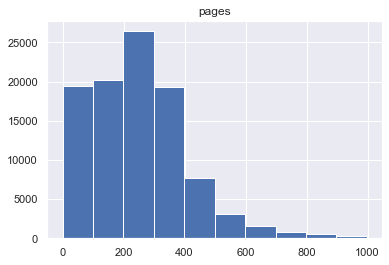

In [85]:
plt.figure(dpi=200)
og.loc[og['pages'] < 1000].hist(column="pages")


array([[<AxesSubplot:title={'center':'pages'}>]], dtype=object)

<Figure size 1200x800 with 0 Axes>

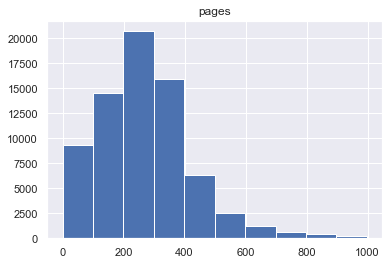

In [88]:
plt.figure(dpi=200)
clean_book.loc[clean_book['pages'] < 1000].hist(column="pages")